<a href="https://colab.research.google.com/github/mcleantom/makemore_from_scratch/blob/main/makemore_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=TCH_1BHY58I

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
words = open('names.txt', 'r').read().splitlines()
words[:8], len(words)

(['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia'],
 32033)

In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
vocab_size = len(itos)
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [12]:
# build the dataset

block_size = 3
X, Y = [], []
for w in words[:5]:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '---->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
... ----> a
..a ----> v
.av ----> a
ava ----> .
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [13]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [14]:
# Embedding table
C = torch.rand((27, 2))

In [15]:
C[5]

tensor([0.0693, 0.1086])

In [19]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.0693, 0.1086])

In [23]:
C[X].shape

torch.Size([32, 3, 2])

In [24]:
emb = C[X]

In [25]:
w1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [26]:
emb @ w1 + b1

RuntimeError: ignored

In [30]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0693, 0.1086],
        [0.0935, 0.1767, 0.0693, 0.1086, 0.3464, 0.5487],
        [0.0693, 0.1086, 0.3464, 0.5487, 0.3464, 0.5487],
        [0.3464, 0.5487, 0.3464, 0.5487, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.6572, 0.2030],
        [0.0935, 0.1767, 0.6572, 0.2030, 0.5763, 0.6629],
        [0.6572, 0.2030, 0.5763, 0.6629, 0.3498, 0.2776],
        [0.5763, 0.6629, 0.3498, 0.2776, 0.2649, 0.3390],
        [0.3498, 0.2776, 0.2649, 0.3390, 0.3498, 0.2776],
        [0.2649, 0.3390, 0.3498, 0.2776, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.2156, 0.7405, 0.2649, 0.3390],
        [0.2156, 0.7405, 0.2649, 0.3390, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.093

In [33]:
torch.cat(torch.unbind(emb, 1), 1)

tensor([[0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0693, 0.1086],
        [0.0935, 0.1767, 0.0693, 0.1086, 0.3464, 0.5487],
        [0.0693, 0.1086, 0.3464, 0.5487, 0.3464, 0.5487],
        [0.3464, 0.5487, 0.3464, 0.5487, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.6572, 0.2030],
        [0.0935, 0.1767, 0.6572, 0.2030, 0.5763, 0.6629],
        [0.6572, 0.2030, 0.5763, 0.6629, 0.3498, 0.2776],
        [0.5763, 0.6629, 0.3498, 0.2776, 0.2649, 0.3390],
        [0.3498, 0.2776, 0.2649, 0.3390, 0.3498, 0.2776],
        [0.2649, 0.3390, 0.3498, 0.2776, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.2156, 0.7405, 0.2649, 0.3390],
        [0.2156, 0.7405, 0.2649, 0.3390, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.093

In [35]:
emb.view(32, 6)

tensor([[0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0693, 0.1086],
        [0.0935, 0.1767, 0.0693, 0.1086, 0.3464, 0.5487],
        [0.0693, 0.1086, 0.3464, 0.5487, 0.3464, 0.5487],
        [0.3464, 0.5487, 0.3464, 0.5487, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.6572, 0.2030],
        [0.0935, 0.1767, 0.6572, 0.2030, 0.5763, 0.6629],
        [0.6572, 0.2030, 0.5763, 0.6629, 0.3498, 0.2776],
        [0.5763, 0.6629, 0.3498, 0.2776, 0.2649, 0.3390],
        [0.3498, 0.2776, 0.2649, 0.3390, 0.3498, 0.2776],
        [0.2649, 0.3390, 0.3498, 0.2776, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.2156, 0.7405, 0.2649, 0.3390],
        [0.2156, 0.7405, 0.2649, 0.3390, 0.2156, 0.7405],
        [0.0935, 0.1767, 0.0935, 0.1767, 0.0935, 0.1767],
        [0.093

In [41]:
h = emb.view(-1, 6) @ w1 + b1
h

tensor([[-0.3912,  0.2132, -0.4275,  ...,  0.7536,  0.0979,  0.7233],
        [-0.4573,  0.2314, -0.4131,  ...,  0.7182,  0.2756,  0.7966],
        [-0.2111,  0.1357, -0.5412,  ...,  0.7463, -0.9827,  0.3366],
        ...,
        [ 0.9148,  0.9990, -0.5562,  ...,  2.4709, -0.4448,  1.0975],
        [ 0.2205,  0.7361, -1.3232,  ...,  1.8517,  0.6671,  4.0710],
        [ 0.2720,  0.8424, -0.9796,  ...,  0.4826, -1.9150,  1.2135]])

In [42]:
h = torch.tanh(h)
h

tensor([[-0.3724,  0.2100, -0.4032,  ...,  0.6373,  0.0976,  0.6189],
        [-0.4279,  0.2274, -0.3911,  ...,  0.6158,  0.2688,  0.6621],
        [-0.2081,  0.1348, -0.4939,  ...,  0.6329, -0.7542,  0.3244],
        ...,
        [ 0.7234,  0.7612, -0.5051,  ...,  0.9858, -0.4176,  0.7996],
        [ 0.2170,  0.6268, -0.8676,  ...,  0.9519,  0.5831,  0.9994],
        [ 0.2655,  0.6871, -0.7529,  ...,  0.4483, -0.9575,  0.8377]])

In [43]:
w2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [44]:
logits = h @ w2 + b2

In [46]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [47]:
prob.shape, prob[0].sum()

(torch.Size([32, 27]), tensor(1.))

In [48]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [49]:
prob[torch.arange(32), Y].log().mean()

tensor([1.5620e-07, 7.9088e-07, 4.1950e-08, 3.1784e-03, 1.5896e-09, 1.8933e-05,
        1.3401e-01, 9.8367e-09, 1.4849e-02, 2.7444e-08, 3.9567e-02, 4.2540e-09,
        2.8476e-01, 2.0607e-06, 1.2773e-02, 2.7780e-12, 4.2191e-09, 1.3553e-08,
        1.0551e-03, 1.3658e-07, 5.0963e-04, 4.8352e-01, 1.1056e-02, 4.0936e-04,
        2.6360e-08, 1.0539e-08, 1.9410e-07, 5.5667e-07, 3.6840e-02, 1.2240e-07,
        2.3136e-01, 1.7571e-13])

In [51]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(12.1840)

In [52]:
# Cleaned up :)

In [59]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b2, W2, b2]
for p in parameters:
  p.requires_grad = True

In [55]:
sum(p.nelement() for p in parameters) # The number of parameters to tune

3408

In [56]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [57]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [60]:
# Forward pass
for _ in range(1000):
  # forward pass
  emb = C[X]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y)

  # backwards pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad
  
print(loss.item())

0.25561758875846863


Full example (all the words)

In [63]:
# build the dataset

block_size = 3
X, Y = [], []
for w in words:
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b2, W2, b2]
for p in parameters:
  p.requires_grad = True

# Forward pass
for i in range(10):
  # forward pass
  emb = C[X]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y)

  if i % 10:
    print(loss.item())

  # backwards pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -0.1 * p.grad
  
print(loss.item())

17.327770233154297
16.143203735351562
15.288034439086914
14.534099578857422
13.848008155822754
13.218352317810059
12.643925666809082
12.125813484191895
11.667390823364258
11.667390823364258


Minibatch

In [75]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b2, W2, b2]
for p in parameters:
  p.requires_grad = True

N = 1000
lre = torch.linspace(-3, 0, N)
lrs = 10**lre
lri = []
lossi = []

# Forward pass
for i in range(N):
  #mini batch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])

  # backwards pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad
  
  lri.append(lre)
  lossi.append(loss.item())
  
print(loss.item())

7.323722839355469


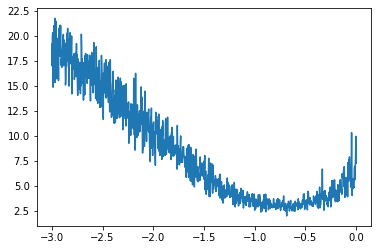

In [77]:
plt.plot(lre, lossi)  # 10^-1 = 0.1 is a good learning rate

In [69]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

2.632587194442749

In [78]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b2, W2, b2]
for p in parameters:
  p.requires_grad = True

N = 10_000

for i in range(N):
  #mini batch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])

  # backwards pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad
  
print(loss.item())

2.7407138347625732


In [88]:
N = 10_000
lr = 0.001

for i in range(N):
  #mini batch construct
  ix = torch.randint(0, X.shape[0], (32,))

  # forward pass
  emb = C[X[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Y[ix])

  # backwards pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  for p in parameters:
    p.data += -lr * p.grad
  
print(loss.item())

2.157465934753418


In [115]:
# Training split, dev/validation split, test split
# 80%, 10%, 10%
def build_dataset(words):
  # build the dataset
  block_size = 3
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [116]:
(Xtr.shape, Ytr.shape)

(torch.Size([182441, 3]), torch.Size([182441]))

In [127]:
# g = torch.Generator().manual_seed(2147483647)
# C = torch.randn((27, 2), generator=g)
# W1 = torch.randn((6, 300), generator=g)
# b1 = torch.randn(300, generator=g)
# W2 = torch.randn((300, 27), generator=g)
# b2 = torch.randn(27, generator=g)
# parameters = [C, W1, b2, W2, b2]
# for p in parameters:
#   p.requires_grad = True

N = 20_000

steps = list(range(N))
lossi = []

for i in range(N):
  #mini batch construct
  ix = torch.randint(0, Xtr.shape[0], (320,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])

  # backwards pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  lossi.append(loss.item())
  
print(loss)

tensor(2.4811, grad_fn=<NllLossBackward0>)


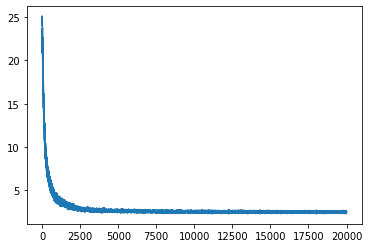

In [125]:
plt.plot(steps, lossi)

In [130]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.405733108520508

In [129]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.409811019897461

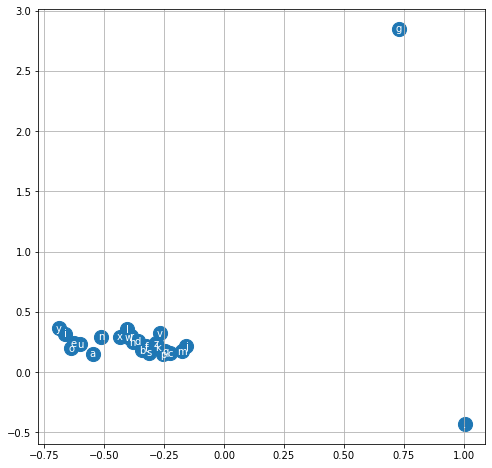

In [131]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [132]:
# Make the dimension embeddings bigger

In [149]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b2, W2, b2]
for p in parameters:
  p.requires_grad = True

stepi = [0]
lossi = []

In [160]:
N = 50_000

for i in range(N):
  #mini batch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])

  # backwards pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  lr = 0.01
  for p in parameters:
    p.data += -lr * p.grad

  stepi.append(stepi[-1]+1)
  lossi.append(loss.log10().item())
  
print(loss)

tensor(2.1044, grad_fn=<NllLossBackward0>)


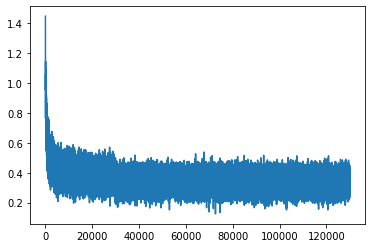

In [161]:
plt.plot(stepi[1:], lossi)

In [162]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.229861259460449

In [163]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.2008109092712402

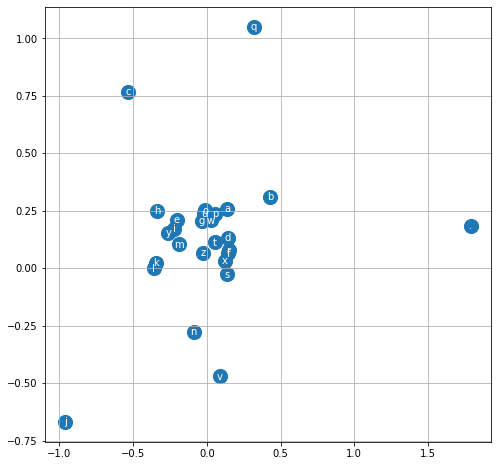

In [164]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [166]:
# Sampling from the model
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  print(''.join(itos[i] for i in out))

ceri.
kamaliusaila.
kayde.
lonishana.
nella.
kama.
da.
samiyaumitharigotti.
moziella.
kinz.
ted.
jenne.
kamside.
eniaviyri.
folspihani.
lavon.
lus.
kasdri.
leenler.
alaira.
